<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-A01793654/blob/main/Actividad7_IBM(Mod_4_MD).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ciencia y analítica de datos
## Actividad 7
### Cursos de IBM
### Data Analysis With Python
### Modulo 4
##### Profesor: Jobish Vallikavungal Devassia
##### Profesor Tutor: Roberto Antonio Guevara González
##### Bernardo Mijangos Flores
##### Matricula A01793654
### Laboratorio 4

# Desarrollo del modelo

Objetivos:

Desarrollar modelos de predicción 

En esta sección, desarrollaremos varios modelos que predecirán el precio del automóvil utilizando las variables o características. Esto es solo una estimación, pero debería darnos una idea objetiva de cuánto debería costar el automóvil.

En el análisis de datos, a menudo usamos el desarrollo de modelos para ayudarnos a predecir futuras observaciones a partir de los datos que tenemos.

Un modelo nos ayudará a comprender la relación exacta entre diferentes variables y cómo se utilizan estas variables para predecir el resultado.

In [81]:
# Importamos la librerias

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression   # para la regresion lineal

import seaborn as sns   # importamos el paquete de visualizacion seaborn
%matplotlib inline 


from sklearn.preprocessing import PolynomialFeatures   # para realizar una transformación polinomial en múltiples características.

from sklearn.pipeline import Pipeline 
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import mean_squared_error   # para determinar el error cuadratico medio MSE

from sklearn.metrics import r2_score   # para el polynomial fit

import matplotlib.pyplot as plt
import numpy as np

In [4]:
# obtenemos los datos del ejercicio del siguiente link

path = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv'

In [5]:
# obtenemos el dataframe con los datos

df = pd.read_csv(path)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


# 1. Regresión lineal y regresión lineal múltiple

## Regresión lineal simple

La regresión lineal simple es un método que nos ayuda a comprender la relación entre dos variables:

*   El predictor/variable independiente (X)
*   La respuesta/variable dependiente (que queremos predecir)(Y)

El resultado de la regresión lineal es una función lineal que predice la variable de respuesta (dependiente) en función de la variable predictora (independiente).

$$
Y: Response \ Variable\\\\\\\\\\
X: Predictor \ Variables
$$

<b>Función lineal</b>
$$
Yhat = a + b  X
$$

*   se refiere a la intersección de la línea de regresión, en otras palabras: el valor de Y cuando X es 0
*   se refiere a la pendiente de la línea de regresión, en otras palabras: el valor con el que cambia Y cuando X aumenta en 1 unidad


In [9]:
# Creando la regresion lineal

lm = LinearRegression()
lm

LinearRegression()

Se requiere ver cómo highway-mpg puede ayudarnos a predecir el precio del automóvil. Usando una regresión lineal simple, Se crea una función lineal con "highway-mpg" como la variable predictora y el "price" como la variable de respuesta.

In [11]:
# asignamos la variable predictora y de respuesta en X y Y

X = df[['highway-mpg']]
Y = df['price']

In [12]:
# Ajuste el modelo lineal

lm.fit(X,Y)

LinearRegression()

In [13]:
# Generamos una prediccion

Yhat=lm.predict(X)
Yhat[0:5]   

array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ,
       20345.17153508])

In [14]:
# Valor del intercepto

lm.intercept_

38423.3058581574

In [15]:
# Valor de la pendiente

lm.coef_

array([-821.73337832])

Con los valores reales obtenemos:

Precio = 38423.31 - 821.73 x highway-mpg

# Pregunta 1a)

Cree un objeto de regresión lineal llamado "lm1".

In [16]:
lm1 = LinearRegression()
lm1

LinearRegression()

# Pregunta  1b):
¿Entrenar el modelo utilizando "engine-size" como variable independiente y "price" como variable dependiente?

In [17]:
lm1.fit(df[['engine-size']], df[['price']])
lm1

LinearRegression()

# Pregunta 1c):

Encuentra la pendiente y el intercepto del modelo.

In [21]:
print('Pendiente',lm1.coef_)
print('Intercepto',lm1.intercept_)

Pendiente [[166.86001569]]
Intercepto [-7963.33890628]


# Pregunta 1d):

¿Cuál es la ecuación de la línea predicha? Puede usar x y yhat o  "engine-size" o "price".

In [26]:
Yhat=-7963.34 + 166.86*X

In [27]:
Price=-7963.34 + 166.86*df['engine-size']

# Regresión lineal múltiple

Para usar más variables en nuestro modelo para predecir el precio del automóvil, podemos usar la regresión lineal múltiple.

La regresión lineal múltiple es muy similar a la regresión lineal simple, pero este método se utiliza para explicar la relación entre una variable de respuesta continua (dependiente) y dos o más variables predictoras (independientes).  La mayoría de los modelos de regresión del mundo real involucran múltiples predictores.


$$
Y: Response \ Variable\\\\\\\\\\
X\_1 :Predictor\ Variable \ 1\\\\
X\_2: Predictor\ Variable \ 2\\\\
X\_3: Predictor\ Variable \ 3\\\\
X\_4: Predictor\ Variable \ 4\\\\
$$


$$
a: intercept\\\\\\\\\\
b\_1 :coefficients \ of\ Variable \ 1\\\\
b\_2: coefficients \ of\ Variable \ 2\\\\
b\_3: coefficients \ of\ Variable \ 3\\\\
b\_4: coefficients \ of\ Variable \ 4\\\\
$$

La ecuacion es:

$$
Yhat = a + b\_1 X\_1 + b\_2 X\_2 + b\_3 X\_3 + b\_4 X\_4
$$


Otros buenos predictores de precio podrían ser:

*  Horsepower
*  Curb-weight
*  Engine-size
*  Highway-mpg

In [29]:
#  uso de estas variables como variables predictoras.

Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]

In [30]:
# Ajuste el modelo lineal utilizando las cuatro variables mencionadas.

lm.fit(Z, df['price'])

LinearRegression()

In [31]:
# Valor del intercepto

lm.intercept_

-15806.62462632922

In [32]:
# Valores de los coeficientes (b1, b2, b3, b4)

lm.coef_

array([53.49574423,  4.70770099, 81.53026382, 36.05748882])

La regresion lineal es:

Price = -15678.742628061467 + 52.65851272 x horsepower + 4.69878948 x curb-weight + 81.95906216 x engine-size + 33.58258185 x highway-mpg

# Pregunta 2a):

Cree y entrene un modelo de regresión lineal múltiple "lm2" en el que la variable de respuesta sea "precio" y la variable de predicción sea "normalized-losses" y "highway-mpg".

In [33]:
lm2 = LinearRegression()
lm2.fit(df[['normalized-losses' , 'highway-mpg']],df['price'])

LinearRegression()

# Pregunta 2b):

Encuentre el coeficiente del modelo

In [34]:
lm2.coef_

array([   1.49789586, -820.45434016])

# 2. Model Evaluation Using Visualization

## Gráfico de regresión

Este gráfico mostrará una combinación de puntos de datos dispersos (un gráfico de dispersión), así como la línea de regresión lineal ajustada que pasa por los datos. Esto nos dará una estimación razonable de la relación entre las dos variables, la fuerza de la correlación, así como la dirección (correlación positiva o negativa).

Visualicemos highway-mpg  como una posible variable predictora del price:

(0.0, 48176.897279695775)

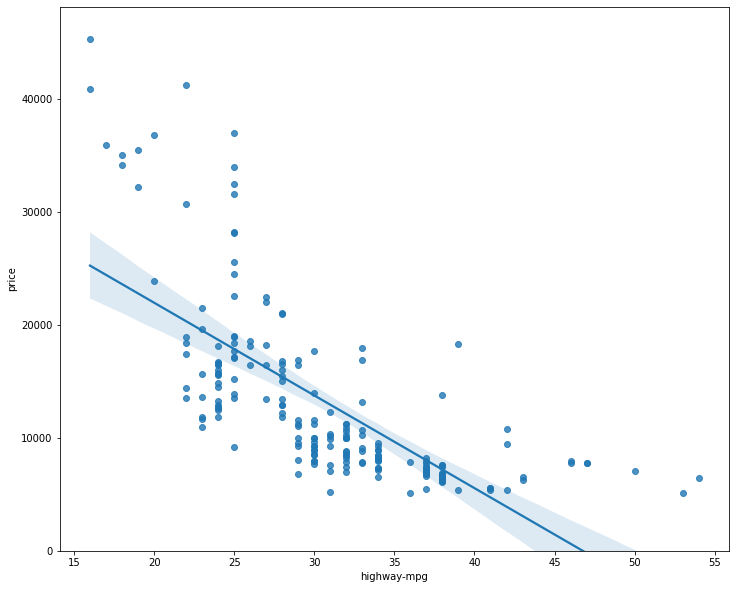

In [36]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x="highway-mpg", y="price", data=df)
plt.ylim(0,)

En este gráfico se observa que "price" está negativamente correlacionado con el highway-mpg ya que la pendiente de regresión es negativa.

Una cosa a tener en cuenta al mirar un gráfico de regresión es prestar atención a cuán dispersos están los puntos de datos alrededor de la línea de regresión. 

Esto le dará una buena indicación de la variación de los datos y si un modelo lineal sería el mejor ajuste o no. Si los datos están demasiado alejados de la línea, este modelo lineal podría no ser el mejor modelo para estos datos.

Comparemos este gráfico con el gráfico de regresión de "peak-rpm".

(0.0, 47414.1)

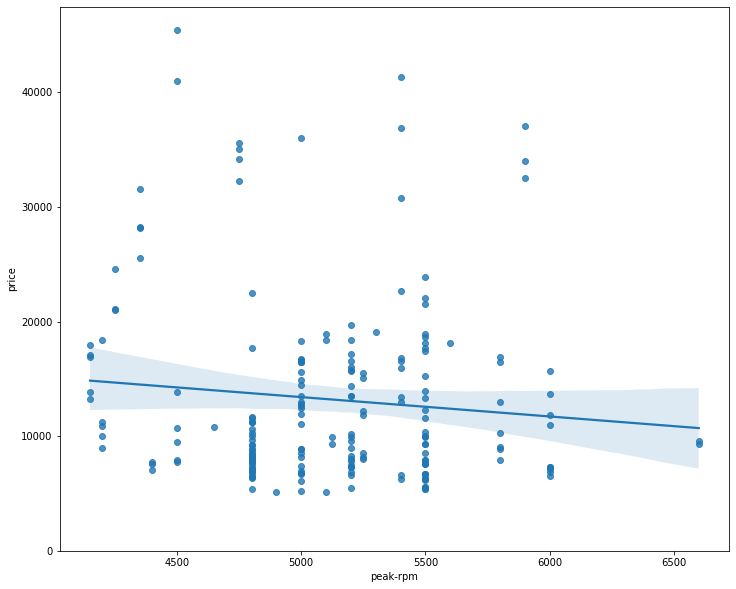

In [37]:
plt.figure(figsize=(width, height))
sns.regplot(x="peak-rpm", y="price", data=df)
plt.ylim(0,)

Al comparar ambos gráficos de regresión vemos que los puntos para "highway-mpg" están mucho más cerca de la línea generada y en promedio disminuyen.

Los puntos de "peak-rpm" están más dispersos alrededor de la línea predicha y es mucho más difícil determinar si los puntos disminuyen o aumentan a medida que aumenta el "peak-rpm".

# Pregunta 3:

Dadas las gráficas de regresión anteriores, ¿las "peak-rpm " o "highway-mpg" están más fuertemente correlacionadas con "price"?

Usa el método ".corr()" para verificar tu respuesta.

In [38]:
df[["peak-rpm","highway-mpg","price"]].corr()

,peak-rpm,highway-mpg,price
peak-rpm,1.000000,-0.058598,-0.101616
highway-mpg,-0.058598,1.000000,-0.704692
price,-0.101616,-0.704692,1.000000


La variable "highway-mpg" tiene una correlación más fuerte con "price", es aproximadamente -0.704692 en comparación con "peak-rpm", que es aproximadamente -0.101616.

La diferencia entre el valor observado (y) y el valor pronosticado (Yhat) se llama residual (e). Cuando observamos un gráfico de regresión, el residuo es la distancia desde el punto de datos hasta la línea de regresión ajustada.

Una gráfica de residuos es un gráfico que muestra los residuos en el eje y vertical y la variable independiente en el eje x horizontal.

Si los puntos en una gráfica de residuos se distribuyen aleatoriamente alrededor del eje x, entonces un modelo lineal es apropiado para los datos.

La distribución aleatoria de residuos significa que la varianza es constante y, por lo tanto, el modelo lineal se ajusta bien a estos datos.

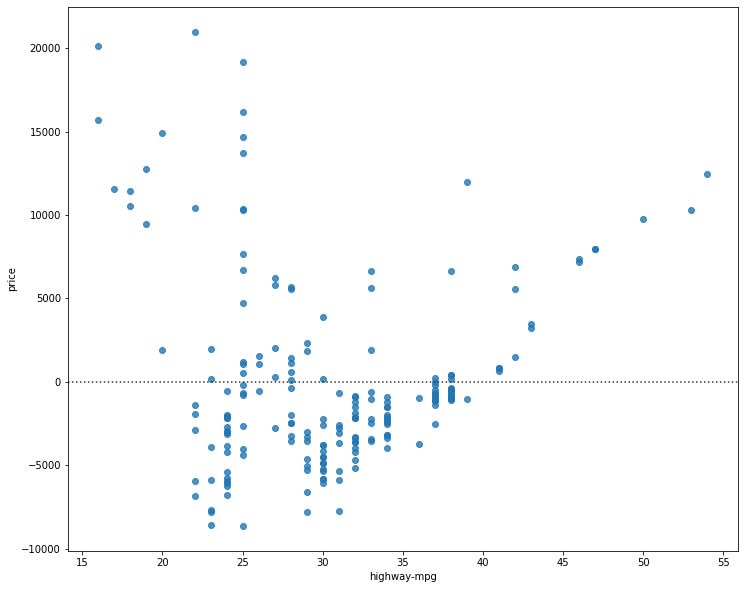

In [39]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.residplot(x=df['highway-mpg'],y=df['price'])
plt.show()

Podemos ver en esta gráfica de residuos que los residuos no se distribuyen aleatoriamente alrededor del eje x, lo que nos lleva a creer que tal vez un modelo no lineal sea más apropiado para estos datos.

# Regresión lineal múltiple

Una forma de ver el ajuste del modelo es mirar el gráfico de distribución. 

Podemos observar la distribución de los valores ajustados que resultan del modelo y compararla con la distribución de los valores reales.

In [40]:
# generamos una predicción

Y_hat = lm.predict(Z)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


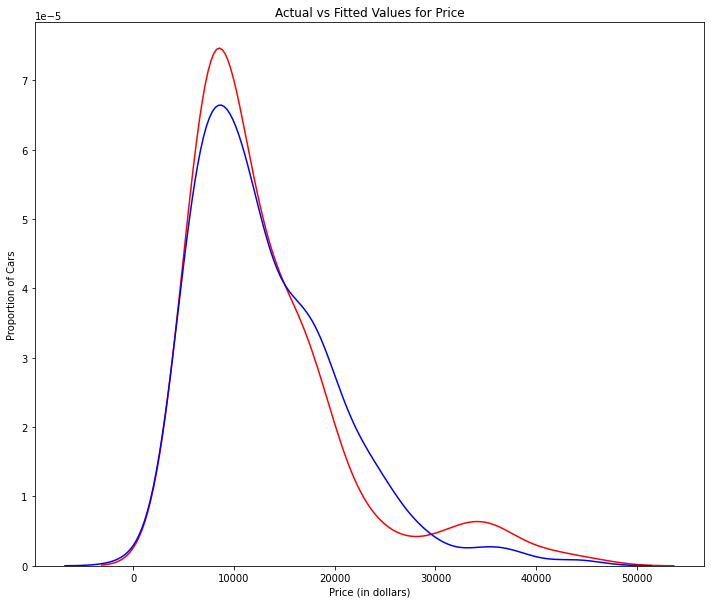

In [41]:
plt.figure(figsize=(width, height))


ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
sns.distplot(Y_hat, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

Se observa que los valores ajustados están razonablemente cerca de los valores reales ya que las dos distribuciones se superponen un poco. Sin embargo, definitivamente hay algo de espacio para mejorar.

# 3. Regresión polinomial y canalizaciones

La regresión polinomial es un caso particular del modelo de regresión lineal general o de los modelos de regresión lineal múltiple.

Obtenemos relaciones no lineales elevando al cuadrado o estableciendo términos de orden superior de las variables predictoras.

Hay diferentes órdenes de regresión polinomial:

<center><b>Quadratic - 2nd Order</b></center>
$$
Yhat = a + b_1 X +b_2 X^2 
$$

<center><b>Cubic - 3rd Order</b></center>
$$
Yhat = a + b_1 X +b_2 X^2 +b_3 X^3\\\\\\\\\\
$$

<center><b>Higher-Order</b>:</center>
$$
Y = a + b_1 X +b_2 X^2 +b_3 X^3 ....\\\\
$$


Vimos anteriormente que un modelo lineal no proporcionaba el mejor ajuste al utilizar "highway-mpg" como variable de predicción.

In [42]:
# definimos la siguiente función para graficar los datos:

def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()

In [43]:
# obtenemos las variables

x = df['highway-mpg']
y = df['price']

In [44]:
# Ajustemos el polinomio usando la función polyfit, luego usemos la función poly1d para mostrar la función polinomial.
# uso del polinomio del tercer orden (cubico)

f = np.polyfit(x, y, 3)
p = np.poly1d(f)
print(p)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


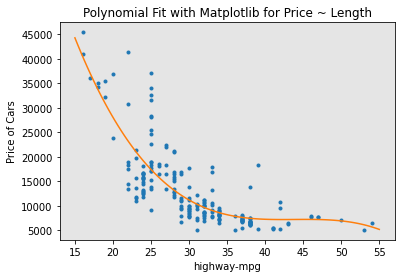

In [45]:
# uso de la funcion para graficar

PlotPolly(p, x, y, 'highway-mpg')

In [46]:

np.polyfit(x, y, 3)

array([-1.55663829e+00,  2.04754306e+02, -8.96543312e+03,  1.37923594e+05])

Se observa en el gráfico que este modelo polinomial funciona mejor que el modelo lineal. Esto se debe a que la función polinomial "hits" genera más puntos de datos.

# Pregunta 4:

Cree un modelo polinomial de 11 órdenes con las variables x, y de arriba.

            11             10             9           8         7
-1.243e-08 x  + 4.722e-06 x  - 0.0008028 x + 0.08056 x - 5.297 x
          6        5             4             3             2
 + 239.5 x - 7588 x + 1.684e+05 x - 2.565e+06 x + 2.551e+07 x - 1.491e+08 x + 3.879e+08


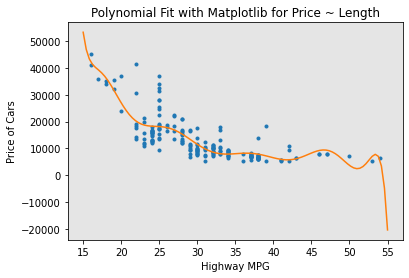

In [50]:
mp1 = np.polyfit(x, y, 11)
p1 = np.poly1d(mp1)
print(p1)
PlotPolly(p1,x,y, 'Highway MPG')

La expresión analítica para la función polinomial multivariante se complica. Por ejemplo, la expresión de un polinomio de segundo orden (grado=2) con dos variables está dada por:

$$
Yhat = a + b\_1 X\_1 +b\_2 X\_2 +b\_3 X\_1 X\_2+b\_4 X\_1^2+b\_5 X\_2^2
$$


In [52]:
# Se genera un objeto PolynomialFeatures de grado 2:

pr=PolynomialFeatures(degree=2)
pr

PolynomialFeatures()

In [54]:
# Los datos originales, hay 201 muestras y 4 funciones.

Z_pr=pr.fit_transform(Z)
Z.shape

(201, 4)

In [56]:
# Después de la transformación, hay 201 muestras y 15 funciones.

Z_pr.shape

(201, 15)

# Pipeline

In [58]:
# Creamos el pipeline creando una lista de tuplas incluyendo el nombre del modelo o estimador y su constructor correspondiente.

Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]

In [59]:
# Ingresamos la lista como un argumento para el constructor pipeline:

pipe=Pipeline(Input)
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [60]:
# Primero, convertimos el tipo de datos Z al tipo flotante para evitar las advertencias de conversión
# que pueden aparecer como resultado de que StandardScaler tome entradas flotantes.

# Luego, podemos normalizar los datos, realizar una transformación y ajustar el modelo simultáneamente.

Z = Z.astype(float)
pipe.fit(Z,y)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [62]:
# Normalizamos los datos, realizamos una transformación y producimos una predicción simultáneamente.

ypipe=pipe.predict(Z)
ypipe[0:4]

array([13102.74784201, 13102.74784201, 18225.54572197, 10390.29636555])

# Pregunta 5:

Cree una canalización que estandarice los datos, luego produzca una predicción usando un modelo de regresión lineal usando las características Z y el objetivo y.

In [63]:
Input=[('scale',StandardScaler()),('model',LinearRegression())]

pipe=Pipeline(Input)

pipe.fit(Z,y)

ypipe=pipe.predict(Z)
ypipe[0:10]

array([13699.11161184, 13699.11161184, 19051.65470233, 10620.36193015,
       15521.31420211, 13869.66673213, 15456.16196732, 15974.00907672,
       17612.35917161, 10722.32509097])

# 4. Medidas para la evaluación dentro de la muestra

Al evaluar nuestros modelos, no solo queremos visualizar los resultados, sino que también queremos una medida cuantitativa para determinar qué tan preciso es el modelo.

Dos medidas muy importantes que se utilizan a menudo en Estadística para determinar la precisión de un modelo son:

<ul>
    <li><b>R^2 / R-squared</b></li>
    <li><b>Mean Squared Error (MSE)</b></li>
</ul>


R-squared

También conocido como coeficiente de determinación, es una medida para indicar qué tan cerca están los datos de la línea de regresión ajustada.

El valor de la R-cuadrado es el porcentaje de variación de la variable de respuesta (y) que se explica mediante un modelo lineal.

Mean Squared Error (MSE)

El error cuadrático medio mide el promedio de los cuadrados de los errores. Es decir, la diferencia entre el valor real (y) y el valor estimado (ŷ).

## Modelo 1: Regresión lineal simple

In [65]:
#highway_mpg_fit
lm.fit(X, Y)
# Find the R^2
print('The R-square is: ', lm.score(X, Y))

The R-square is:  0.4965911884339176


Podemos decir que 49.659% de la variación del precio se explica por este modelo lineal simple "horsepower_fit".

Calculo del MSE:

Podemos predecir la salida, es decir, "yhat" usando el método de predicción, donde X es la variable de entrada:

In [67]:
Yhat=lm.predict(X)
print('La salida de los primeros 4 valores es: ', Yhat[0:4])

La salida de los primeros 4 valores es:  [16236.50464347 16236.50464347 17058.23802179 13771.3045085 ]


In [70]:
# comprobamos los resultados previstos con los resultados reales 

mse = mean_squared_error(df['price'], Yhat)
print('El MSE de price y el valor predicho es: ', mse)

El MSE de price y el valor predicho es:  31635042.944639888


## Modelo 2: Regresión Lineal Múltiple

In [71]:
# fit the model 
lm.fit(Z, df['price'])
# Find the R^2
print('The R-square is: ', lm.score(Z, df['price']))

The R-square is:  0.8093562806577457


Se observar que 80.896 % de la variación de price se explica por esta regresión lineal múltiple "multi_fit".

In [73]:
# Realizamos una prediccion 

Y_predict_multifit = lm.predict(Z)

In [75]:
# comparacion de los resultados predichos con los resultados reales

print('El MSE de price y los valores predichos usando usando multifit es: ', \
      mean_squared_error(df['price'], Y_predict_multifit))

El MSE de price y los valores predichos usando usando multifit es:  11980366.87072649


# Modelo 3: Ajuste polinomial

In [78]:
# se aplica la funcion para obtener el valor de R^2:

r_squared = r2_score(y, p(x))
print('El valor R-square es: ', r_squared)

El valor R-square es:  0.674194666390652


Se observa que 67.419 % de la variación del precio se explica por este ajuste polinomial

In [79]:
# MSE

mean_squared_error(df['price'], p(x))

20474146.426361218

# 5. Predicción y Toma de Decisiones

### Predicción

En la sección anterior, entrenamos el modelo usando el método de ajuste. Ahora usaremos el método predict para producir una predicción.

In [83]:
new_input=np.arange(1, 100, 1).reshape(-1, 1)     # Se crea una nueva entrada

lm.fit(X, Y)    # fit del modelo
lm

LinearRegression()

In [84]:
# se produce una prediccion

yhat=lm.predict(new_input)
yhat[0:5]

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([37601.57247984, 36779.83910151, 35958.10572319, 35136.37234487,
       34314.63896655])

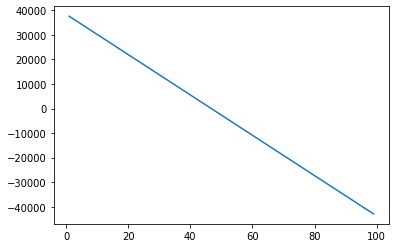

In [85]:
plt.plot(new_input, yhat)
plt.show()

# Toma de decisiones: determinación de un buen ajuste del modelo

Al comparar modelos, el modelo con el valor R cuadrado más alto se ajusta mejor a los datos.

Echemos un vistazo a los valores para los diferentes modelos.

Regresión lineal simple: uso de Highway-mpg como variable predictora del precio.

R-cuadrado: 0,49659118843391759
MSE: 3,16x10^7

Regresión lineal múltiple: uso de Horsepower, Curb-weight, Engine-size y Highway-mpg como variables predictoras del price.

R-cuadrado: 0.80896354913783497
MSE: 1,2x10^7
Ajuste polinomial: Uso de Highway-mpg como variable predictora de precio.

R-cuadrado: 0,6741946663906514
MSE: 2,05 x 10^7

# Modelo de regresión lineal simple (SLR) frente a modelo de regresión lineal múltiple (MLR)


Por lo general, cuantas más variables tenga, mejor será su modelo para predecir, pero esto no siempre es cierto. En ocasiones, es posible que no tenga suficientes datos, que se encuentre con problemas numéricos o que muchas de las variables no sean útiles e incluso actúen como ruido. Como resultado, siempre debe verificar el MSE y el R^2.

Para comparar los resultados de los modelos MLR y SLR, observamos una combinación de R-squared y MSE para llegar a la mejor conclusión sobre el ajuste del modelo.

*   SE: El MSE de SLR es 3,16x10^7 mientras que MLR tiene un MSE de 1,2x10^7. El MSE de MLR es mucho más pequeño.
*   R-cuadrado: En este caso también podemos ver que hay una gran diferencia entre el R-cuadrado de la SLR y el R-cuadrado de la MLR.

El R-cuadrado de la SLR (0,497) es muy pequeño en comparación con el R-cuadrado de la MLR (0,809).

Este R-cuadrado en combinación con el MSE muestra que MLR parece ser el mejor ajuste del modelo en este caso en comparación con SLR.

# Modelo lineal simple (SLR) frente a ajuste polinomial

* MSE: Podemos ver que Polynomial Fit redujo el MSE, ya que este MSE es más pequeño que el de SLR.

*   R-cuadrado: El R-cuadrado para Polynomial Fit es más grande que el R-cuadrado para SLR, por lo que Polynomial Fit también aumentó bastante el R-cuadrado.

Dado que el ajuste polinomial resultó en un MSE más bajo y un R-cuadrado más alto, podemos concluir que este fue un modelo de mejor ajuste que la regresión lineal simple para predecir el "price" con "highwayy-mpg" como variable de predicción.

# Regresión lineal múltiple (MLR) frente a ajuste polinomial

*  MSE: El MSE para MLR es más pequeño que el MSE para Polynomial Fit.
*  R-cuadrado: El R-cuadrado para el MLR también es mucho mayor que para el Ajuste polinomial.

# Conclusion

Comparando estos tres modelos, concluimos que el modelo MLR es el mejor modelo para poder predecir el precio a partir de nuestro conjunto de datos. Este resultado tiene sentido ya que tenemos 27 variables en total y sabemos que más de una de esas variables son predictores potenciales del precio final del automóvil.